In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate
from scipy.integrate import odeint
from scipy import interpolate
from matplotlib import patches
from scipy.signal import find_peaks

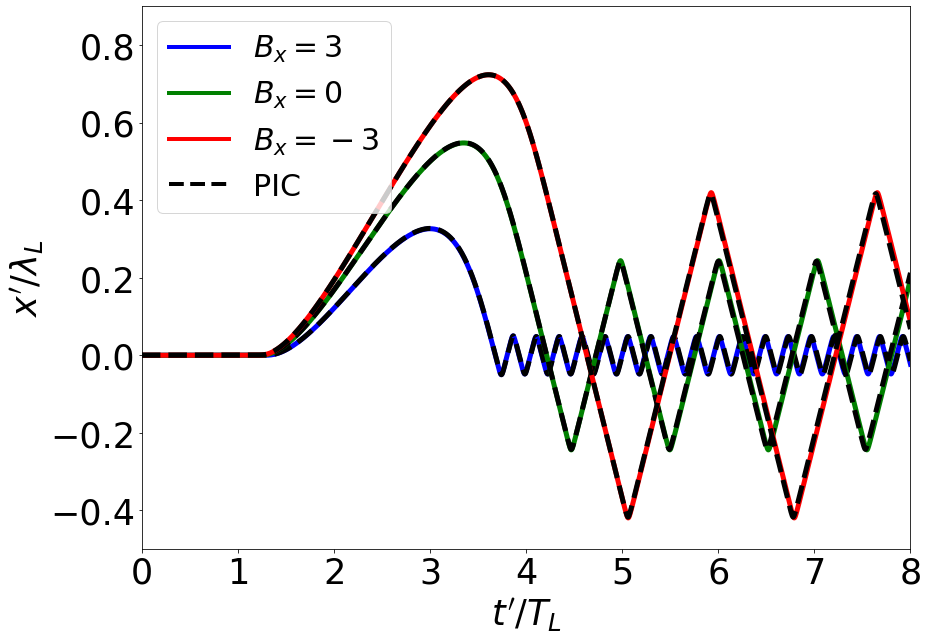

In [2]:
folders = ["./fig1/npys_circular", "./fig1/npys_linear"]
outputs = ["fig1_a.pdf", "fig1_b.pdf"]
index=0


t_model=np.load(folders[index]+'/t_model.npy')
x_model=np.load(folders[index]+'/x_model.npy')
t_pic_10=np.load(folders[index]+'/t_pic.npy')
x_pic_10=np.load(folders[index]+'/x_pic.npy')

t_model_2=np.load(folders[index]+'/t_model_3.npy')
x_model_2=np.load(folders[index]+'/x_model_3.npy')
t_pic_10_2=np.load(folders[index]+'/t_pic_3.npy')
x_pic_10_2=np.load(folders[index]+'/x_pic_3.npy')

t_model_3=np.load(folders[index]+'/t_model_-3.npy')
x_model_3=np.load(folders[index]+'/x_model_-3.npy')
t_pic_10_3=np.load(folders[index]+'/t_pic_-3.npy')
x_pic_10_3=np.load(folders[index]+'/x_pic_-3.npy')

plt.figure(figsize=(13,9))
plt.plot(t_model_2/2/np.pi, x_model_2/2/np.pi, 'b', lw=5, label = "$B_x=3$")
plt.plot(t_pic_10_2/2/np.pi-1, x_pic_10_2/2/np.pi-3, 'k--', lw=5)

plt.plot(t_model/2/np.pi, x_model/2/np.pi, 'g', lw=5, label = "$B_x=0$")
plt.plot(t_pic_10/2/np.pi-1, x_pic_10/2/np.pi-3, 'k--', lw=5)

plt.plot(t_model_3/2/np.pi, x_model_3/2/np.pi, 'r', lw=5, label = "$B_x=-3$")
plt.plot(t_pic_10_3/2/np.pi-1, x_pic_10_3/2/np.pi-3, 'k--', lw=5)

plt.plot([], 'k--', label="PIC")

plt.xlim(0,8)
plt.ylim(-0.5, 0.9)
#plt.xlabel('$t$', fontsize=35)
plt.xlabel('$t^\prime/T_L$', fontsize=35)
plt.ylabel('$x^\prime/\lambda_L$', fontsize=35)
#plt.ylabel('$x$', fontsize=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

leg = plt.legend(fontsize=30)

for line in leg.get_lines():
    line.set_linewidth(4.0)

plt.subplots_adjust(left=0.15, bottom=0.15)
plt.tight_layout()
plt.savefig(outputs[index], format='pdf')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


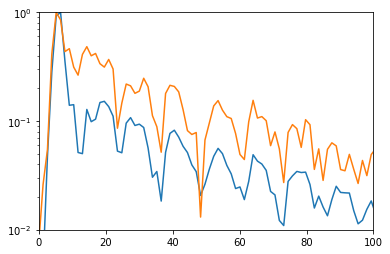

<Figure size 432x288 with 0 Axes>

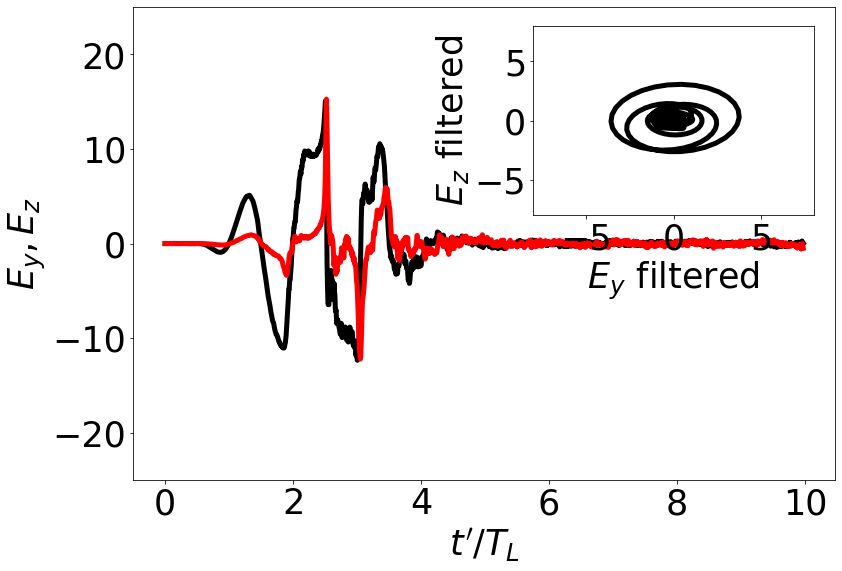

In [12]:
Time=20
Npercycle=1000
NofTS=Time*Npercycle
xi_end=Time*2*np.pi

xi = np.linspace(0, xi_end, NofTS)

import pickle
file = open('./fig2/fig_2.pkl', 'rb')
anss = pickle.load(file)
file.close()

field_data_y = np.genfromtxt("./fig2/18/Ey_2d_0.txt")
field_data_z = np.genfromtxt("./fig2/18/Ez_2d_0.txt")

filter_center=15
filter_width=5

bandgap_filter_minus=np.exp(-(anss[0][0]*2*np.pi-filter_center)**16/filter_width**16)
bandgap_filter_plus=np.exp(-(anss[0][0]*2*np.pi+filter_center)**16/filter_width**16)
bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
sp_y=np.fft.fft(anss[0][1][:int(len(anss[0][1])/2)])
sp_z=np.fft.fft(anss[0][2][:int(len(anss[0][1])/2)])

sp_y_filt = bandgap_filter*sp_y
sp_z_filt = bandgap_filter*sp_z
filtered_y=np.fft.ifft(sp_y_filt)
filtered_z=np.fft.ifft(sp_z_filt)

t = np.linspace(0, 30, field_data_y.shape[0])
ind1=5000
ind2=7000
sp_y_2 = np.fft.fft(field_data_y[ind1:ind2])
sp_z_2 = np.fft.fft(field_data_z[ind1:ind2])
length = t[ind1:ind2].shape[-1]
w = np.fft.fftfreq(length, d = t[1]-t[0])

bandgap_filter_minus=np.exp(-(w-filter_center)**16/filter_width**16)
bandgap_filter_plus=np.exp(-(w+filter_center)**16/filter_width**16)
bandgap_filter=bandgap_filter_minus+bandgap_filter_plus
sp_y_filt_2 = bandgap_filter*sp_y_2
sp_z_filt_2 = bandgap_filter*sp_z_2
filtered_y_2=np.fft.ifft(sp_y_filt_2)
filtered_z_2=np.fft.ifft(sp_z_filt_2)

plt.figure()
plt.semilogy(w*2*np.pi,abs(sp_y_2)/np.amax(abs(sp_y_2)))
plt.semilogy(w*2*np.pi,abs(sp_z_2)/np.amax(abs(sp_z_2)))
plt.xlim(0,100)
plt.ylim(1e-2,1)


#fig, ax = plt.subplots(2,2, figsize=(30,20))
plt.figure()
fig, ax0 = plt.subplots(figsize=(13,9))

index=1

if index == 0:
    ax0.plot(xi[:10000]/2/np.pi, anss[0][2][:10000], lw=5, color='k')
    ax0.plot(xi[:10000]/2/np.pi, anss[0][1][:10000], lw=5, color='r')
    ax0.tick_params(axis='both', labelsize=35)
    ax0.set_xlabel("$t'/T_L$", fontsize=35)
    ax0.set_ylabel("$E_y,E_z$", fontsize=35)
    ax0.set_ylim(-25,25)

    ax1=ax0.inset_axes([0.57,0.56,0.4,0.4])

    ax1.plot(filtered_z, filtered_y, lw=5, color='k')
    ax1.tick_params(axis='both', labelsize=35)
    ax1.set_xlabel("$E_y$ filtered", fontsize=35)
    ax1.set_ylabel("$E_z$ filtered", fontsize=35)
    ax1.set_xlim(-8.0,8.0)
    ax1.set_ylim(-8.0,8.0)
    plt.subplots_adjust(left=0.15, bottom=0.15)
    plt.savefig("fig2_a.pdf", format='pdf');

elif index == 1:
    ax0.plot(t[ind1:9150]-t[ind1], field_data_y[ind1:9150], lw=5, color='k')
    ax0.plot(t[ind1:9150]-t[ind1], field_data_z[ind1:9150], lw=5, color='r')
    ax0.tick_params(axis='both', labelsize=35)
    ax0.set_xlabel("$t'/T_L$", fontsize=35)
    ax0.set_ylabel("$E_y,E_z$", fontsize=35)
    ax0.set_ylim(-25,25)

    ax1=ax0.inset_axes([0.57,0.56,0.4,0.4])

    ax1.plot(filtered_y_2, filtered_z_2, lw=5, color='k')
    ax1.tick_params(axis='both', labelsize=35)
    ax1.set_xlabel("$E_y$ filtered", fontsize=35)
    ax1.set_ylabel("$E_z$ filtered", fontsize=35)
    ax1.set_xlim(-8.0,8.0)
    ax1.set_ylim(-8.0,8.0)
    plt.subplots_adjust(left=0.15, bottom=0.15)
    plt.savefig("fig2_b.pdf", format='pdf');


3495.2403036855917
3495.2402547366482


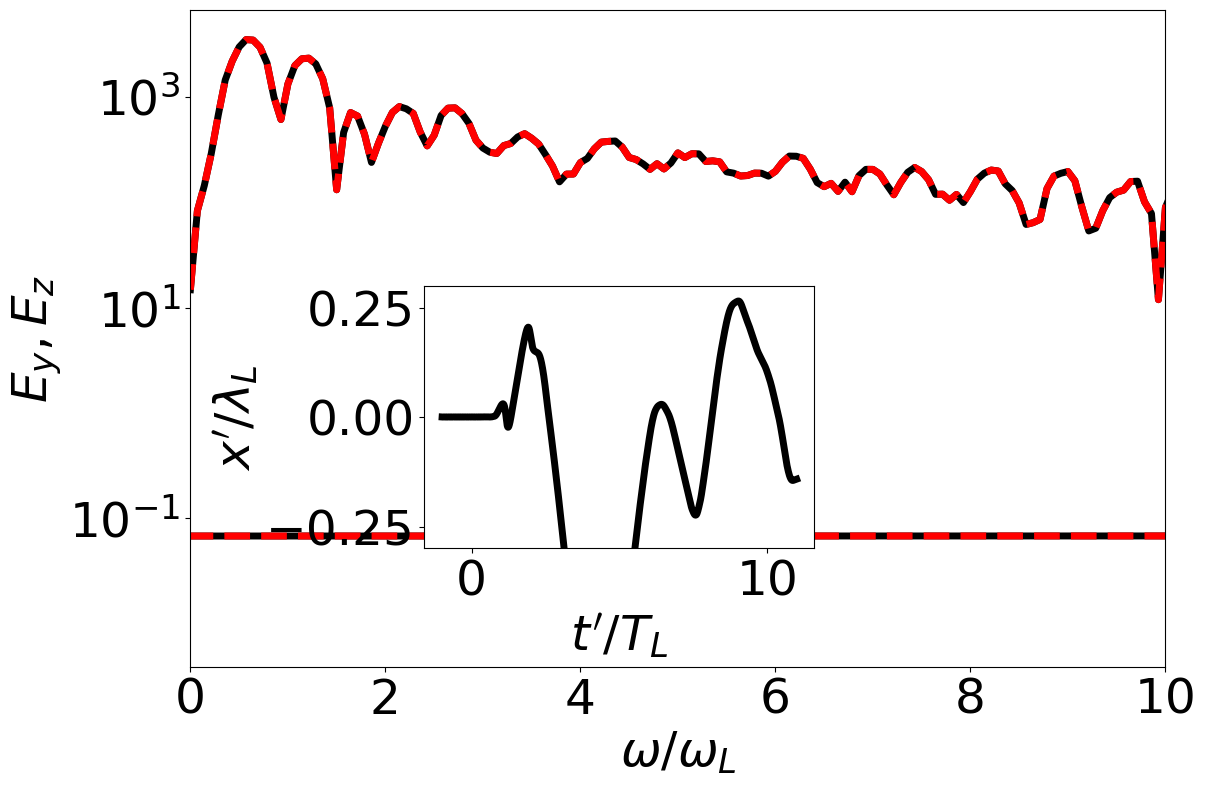

In [5]:
folder = "./fig3/"
bxs = [0, 25, 80]
outputs = ["fig3_a.pdf", "fig3_b.pdf", "fig3_c.pdf"]


index = 0
w = np.load(folder+"w.npy")
sp_z = np.load(folder+"sp_z_"+str(bxs[index])+".npy")
sp_y = np.load(folder+"sp_y_"+str(bxs[index])+".npy")

t_pic=np.load(folder+'/t_pic_'+str(bxs[index])+'.npy')
x_pic=np.load(folder+'/x_pic_'+str(bxs[index])+'.npy')

fig, ax0 = plt.subplots(figsize=(13,9))
print(np.amax(abs(sp_y)))
print(np.amax(abs(sp_z)))
#ax0.semilogy(w*2*np.pi,abs(sp_y)/np.amax(abs(sp_y)), 'k', lw=5)
#ax0.semilogy(w*2*np.pi,abs(sp_z)/np.amax(abs(sp_z)), 'r--', lw=5)

ax0.semilogy(w*2*np.pi,abs(sp_y), 'k', lw=5)
ax0.semilogy(w*2*np.pi,abs(sp_z), 'r--', lw=5)

ax0.set_xlim(0,10)
#ax0.set_ylim(5e-5,2)
ax0.set_xlabel('$\omega / \omega_L$', fontsize=35)
ax0.set_ylabel("$E_y,E_z$", fontsize=35)
#plt.legend(fontsize=35)
ax0.tick_params(axis='both', labelsize=35)

#index 0
ax1=ax0.inset_axes([0.24,0.18,0.4,0.4])
#index 1
#ax1=ax0.inset_axes([0.57,0.18,0.4,0.4])
#index 2
#ax1=ax0.inset_axes([0.57,0.56,0.4,0.4])

ax1.plot(t_pic/2/np.pi-1, x_pic/2/np.pi-3, 'k', lw=5)
ax1.tick_params(axis='both', labelsize=35)
ax1.set_ylim(-0.3, 0.3)
ax1.set_xlabel('$t^\prime/T_L$', fontsize=35)
ax1.set_ylabel('$x^\prime/\lambda_L$', fontsize=35)


plt.subplots_adjust(left=0.15, bottom=0.15)

plt.savefig(outputs[index], format='pdf')


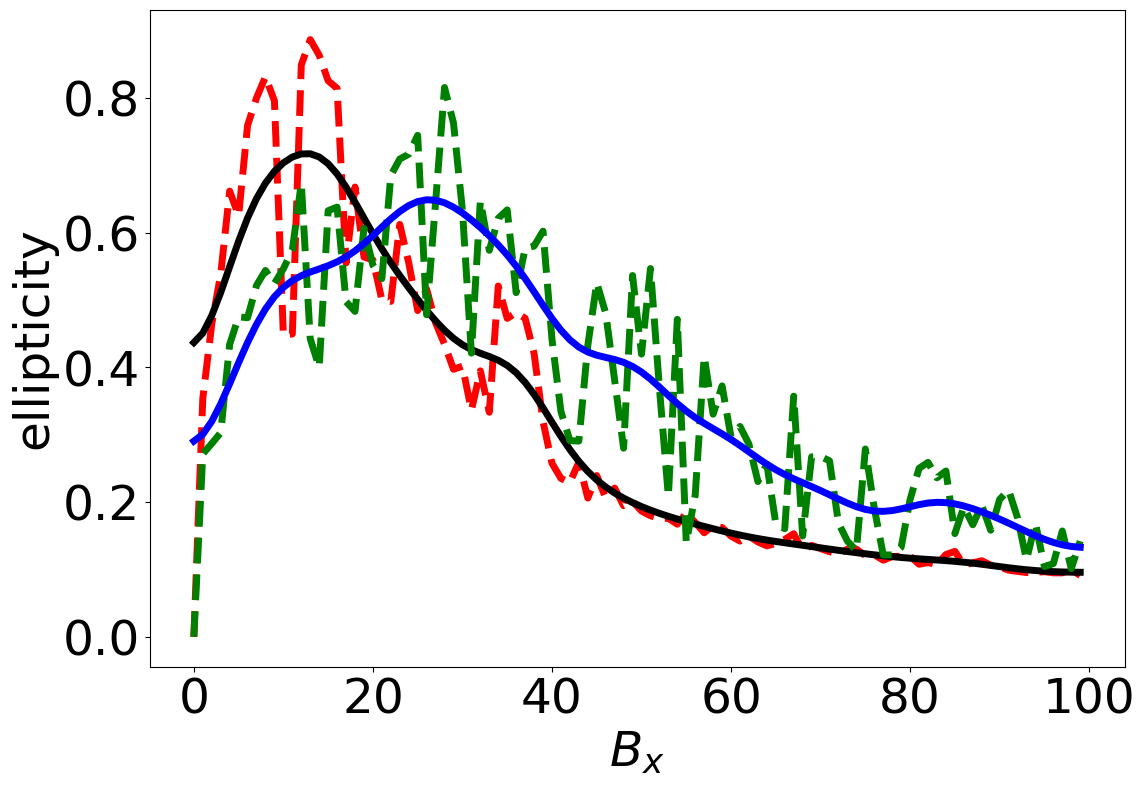

In [6]:
from scipy.ndimage import gaussian_filter1d

els10_mean = np.load("./fig4/els10_mean.npy")
els30_mean = np.load("./fig4/els30_mean.npy")

els10 = gaussian_filter1d(els10_mean, 4)
els30 = gaussian_filter1d(els30_mean, 4)

plt.figure(figsize=(13,9))


plt.plot(els10_mean, 'r--', lw=5)
plt.plot(els10, 'k', lw=5)
plt.plot(els30_mean, 'g--', lw=5)
plt.plot(els30, 'b', lw=5)



#plt.xlim(0,8)
#plt.ylim(-0.5, 0.7)

plt.xlabel('$B_x$', fontsize=35)
plt.ylabel('ellipticity', fontsize=35)
#plt.legend(fontsize=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

plt.subplots_adjust(left=0.15, bottom=0.15)

plt.savefig("fig4_b.pdf", format='pdf')

/tmp/ipykernel_7240/1390375764.py:36: RuntimeWarning: divide by zero encountered in double_scalars
  a0s[i] = denom*value/(second+other_second)
/tmp/ipykernel_7240/1390375764.py:37: RuntimeWarning: divide by zero encountered in double_scalars
  a0s_up[i] = denom*value_up/(second+other_second)
/tmp/ipykernel_7240/1390375764.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  a0s_dn[i] = denom*value_dn/(second+other_second)


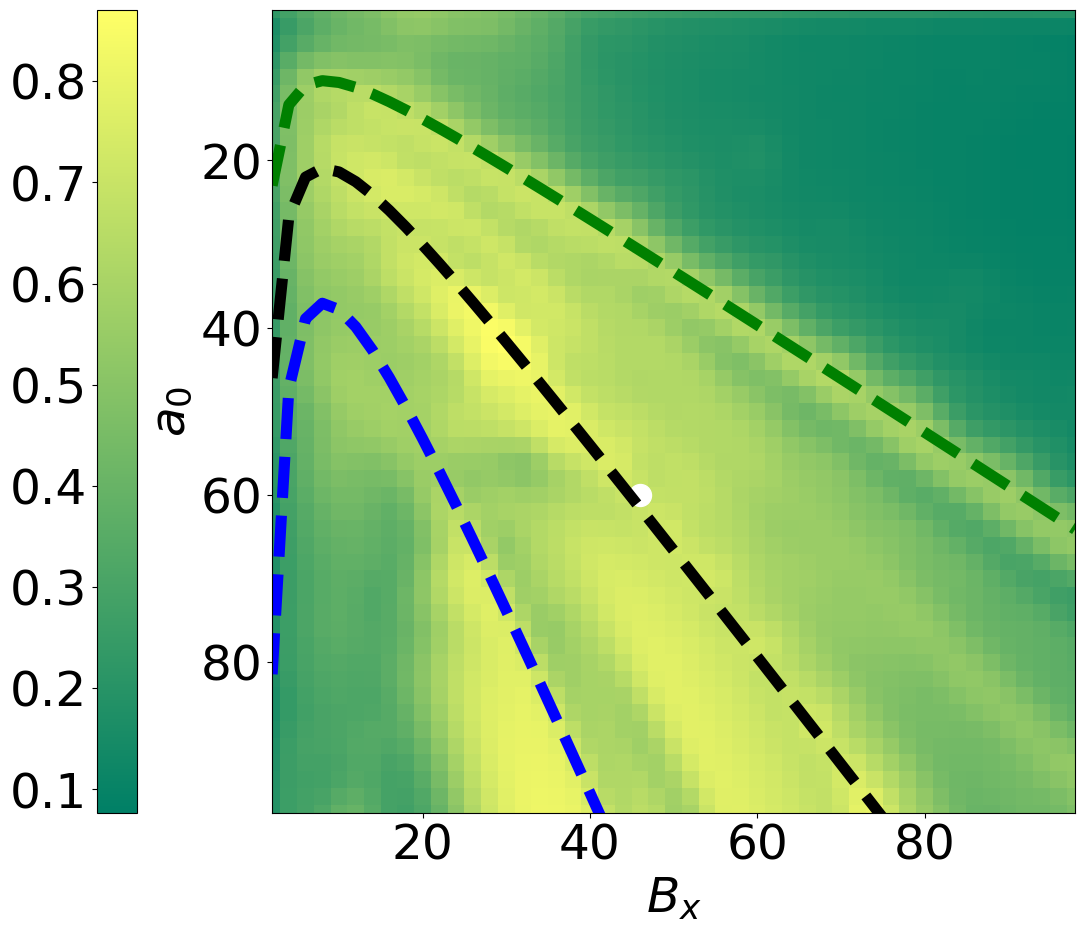

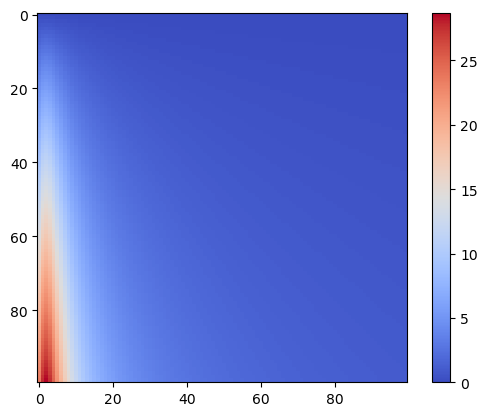

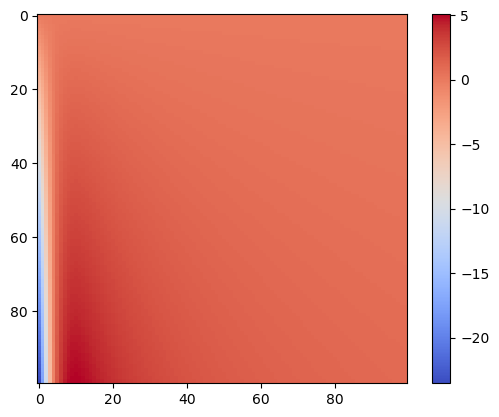

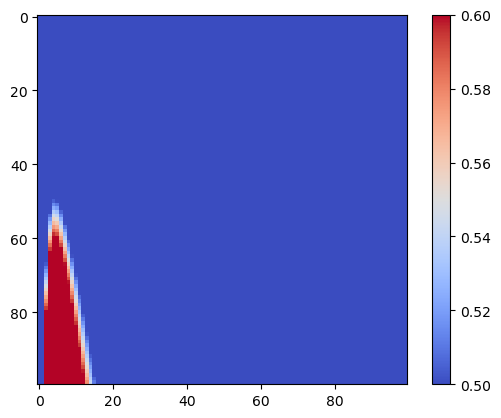

In [17]:
from scipy.ndimage import gaussian_filter1d

folder = "./fig4_alt/"

ncrs = [2000, 4000, 8000, 50000]
index = 2

#filt_y = np.load(folder+"filtered_y_"+str(ncrs[index])+"_30.npy")
#filt_z = np.load(folder+"filtered_z_"+str(ncrs[index])+"_30.npy")
els_mean = np.load(folder+"els"+str(ncrs[index])+"_mean.npy")

#els=els_mean
els = gaussian_filter1d(els_mean, 1, axis=1)
els = gaussian_filter1d(els, 1, axis=0)

epsilon = ncrs[index]*0.001
ep = epsilon


#value = 1.5 #this is for index=3

value_up = 4.6
value = 2.6
value_dn= 1.3
valll = 100

bxs = np.arange(0, valll,2)
a0s = np.zeros(len(bxs))
a0s_up = np.zeros(len(bxs))
a0s_dn = np.zeros(len(bxs))
for i, bx in enumerate(bxs):
    denom = bx**4+2*bx**2*(ep**2-1)+(ep**2+1)**2
    second = bx**3+bx**2*ep+bx*(ep**2-1)+ep**3+ep
    other_second = bx**3-bx**2*ep+bx*(ep**2-1)-ep**3-ep
    maxi = np.max((second+other_second)/denom)
    a0s[i] = denom*value/(second+other_second)
    a0s_up[i] = denom*value_up/(second+other_second)
    a0s_dn[i] = denom*value_dn/(second+other_second)
            
fig, ax0 = plt.subplots(figsize=(18,11))
im = ax0.imshow(els.T[:,:], cmap='summer')#'coolwarm')
#plt.colorbar()

ax0.plot(bxs/2, a0s/2, 'k--', lw=8)
ax0.plot(bxs/2, a0s_up/2, 'b--', lw=8)
ax0.plot(bxs/2, a0s_dn/2, 'g--', lw=8)


ax0.set_xticks(np.arange(0,valll//2)[::10])
ax0.set_xticklabels(bxs[::10], fontsize=35)
ax0.set_yticks(np.arange(0,valll//2)[::10])
ax0.set_yticklabels(bxs[::10], fontsize=35)
ax0.set_xlabel("$B_x$", fontsize=35)
ax0.set_ylabel("$a_0$", fontsize=35)
ax0.set_xlim(1, 49)
ax0.set_ylim(49, 1)
ax0.scatter([23],[30], c='w', s=250, zorder=2)
cbar = fig.colorbar(im, orientation='vertical', location='left');
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(35)

'''ax1=ax0.inset_axes([0.7,0.65,0.5,0.5])

ax1.plot(filt_z, filt_y, lw=5, color='k')
ax1.tick_params(axis='both', labelsize=35)
ax1.set_xlabel("$E_y$ filtered", fontsize=35)
ax1.set_ylabel("$E_z$ filtered", fontsize=35)
ax1.set_xlim(-24.0,24.0)
ax1.set_ylim(-25.0,25.0)'''
plt.subplots_adjust(left=0.15, bottom=0.15)
#plt.savefig("fig4_a.pdf", format='pdf')
plt.savefig("fig4_a.png")

def coef_y():
    density = ncrs[index]#+20000
    thickness=0.001
    alpha=density*thickness
    epsilon=alpha*0.5
    epss = [epsilon]
    bxss = np.linspace(0, 100, 100)
    a0ss = np.linspace(0, 100, 100)
    size = 100
    res = np.zeros((size,size))
    i = 0
    j = 0
    for ep in epss:
        for a0 in a0ss:
            for bx in bxss:
                denom = bx**4+2*bx**2*(ep**2-1)+(ep**2+1)**2
                second = bx**3+bx**2*ep+bx*(ep**2-1)+ep**3+ep
                res[j,i] = a0*second/denom
                if i == size-1:
                    j = j+1
                i = (i+1)%size

    return res
def coef_z():
    density = ncrs[index]#+20000
    thickness=0.001
    alpha=density*thickness
    epsilon=alpha*0.5
    epss = [epsilon]
    bxss = np.linspace(0, 100, 100)
    a0ss = np.linspace(0, 100, 100)
    size = 100
    res = np.zeros((size,size))
    i = 0
    j = 0
    for ep in epss:
        for a0 in a0ss:
            for bx in bxss:
                denom = bx**4+2*bx**2*(ep**2-1)+(ep**2+1)**2
                second = bx**3-bx**2*ep+bx*(ep**2-1)-ep**3-ep
                res[j,i] = a0*second/denom
                if i == size-1:
                    j = j+1
                i = (i+1)%size
    #res[res>0] = 0.0
    return res

plt.figure()
plt.imshow(coef_y(), cmap='coolwarm')
plt.colorbar()
plt.figure()
plt.imshow(coef_z(), cmap='coolwarm')
plt.colorbar()
plt.figure()
plt.imshow((coef_z()+coef_y())/np.max(coef_z()+coef_y()), cmap='coolwarm', vmin=0.5, vmax=0.6)#, vmax=0.6, vmin=0.1)
plt.colorbar()

In [ ]:
#### from scipy.ndimage import gaussian_filter1d

folder = "./fig4_alt/"

ncrs = [2000, 4000, 8000, 50000]
index = 2

#filt_y = np.load(folder+"filtered_y_"+str(ncrs[index])+"_30.npy")
#filt_z = np.load(folder+"filtered_z_"+str(ncrs[index])+"_30.npy")
els_mean = np.load(folder+"els"+str(ncrs[index])+"_mean.npy")
els = gaussian_filter1d(els_mean, 3, axis=1)
els = gaussian_filter1d(els, 3, axis=0)
#els=els_mean

epsilon = ncrs[index]*0.001/2.
value = 1.4107
value_up = 4.
value_dn=0.8
valll = 100
bxs = np.arange(0, valll,2)
a0s = np.zeros(len(bxs))
a0s_up = np.zeros(len(bxs))
a0s_dn = np.zeros(len(bxs))
for i, bx in enumerate(bxs):
    a0s[i] = value*(epsilon**2+bx**2)/(bx+epsilon)
    a0s_dn[i] = value_up*(epsilon**2+bx**2)/(bx+epsilon)
    a0s_up[i] = value_dn*(epsilon**2+bx**2)/(bx+epsilon)

fig, ax0 = plt.subplots(figsize=(18,11))
im = ax0.imshow(els.T[:,:], cmap='coolwarm')
#plt.colorbar()
ax0.plot(bxs/2, a0s/2, 'k--', lw=8)
ax0.plot(bxs/2, a0s_up/2, 'g--', lw=8)
ax0.plot(bxs/2, a0s_dn/2, 'g--', lw=8)
ax0.set_xticks(np.arange(0,valll//2)[::10], bxs[::10], fontsize=35)
ax0.set_yticks(np.arange(0,valll//2)[::10], bxs[::10], fontsize=35)
ax0.set_xlabel("$B_x$", fontsize=35)
ax0.set_ylabel("$a_0$", fontsize=35)
ax0.set_xlim(1, 49)
ax0.set_ylim(49, 1)
ax0.scatter([15],[19], c='w', s=250, zorder=2)
cbar = fig.colorbar(im, orientation='vertical', location='left');
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(35)

'''ax1=ax0.inset_axes([0.7,0.65,0.5,0.5])

ax1.plot(filt_z, filt_y, lw=5, color='k')
ax1.tick_params(axis='both', labelsize=35)
ax1.set_xlabel("$E_y$ filtered", fontsize=35)
ax1.set_ylabel("$E_z$ filtered", fontsize=35)
ax1.set_xlim(-24.0,24.0)
ax1.set_ylim(-25.0,25.0)'''
plt.subplots_adjust(left=0.15, bottom=0.15)
#plt.savefig("fig4_a.pdf", format='pdf')
plt.savefig("fig4_a.png")

In [ ]:
from scipy.ndimage import gaussian_filter1d

folder = "./fig4_alt/"

ncrs = [2000, 4000, 8000, 50000]
index = 3

#filt_y = np.load(folder+"filtered_y_"+str(ncrs[index])+"_30.npy")
#filt_z = np.load(folder+"filtered_z_"+str(ncrs[index])+"_30.npy")
els_mean = np.load(folder+"els"+str(ncrs[index])+"_mean.npy")
#els = gaussian_filter1d(els_mean, 3, axis=1)
#els = gaussian_filter1d(els, 3, axis=0)
els = els_mean

epsilon = ncrs[index]*0.001/2.
print(epsilon)
value = 1.4107
value_up = 4.
value_dn=0.8
valll = 100
bxs = np.arange(0, valll,2)
a0s = np.zeros(len(bxs))
a0s_up = np.zeros(len(bxs))
a0s_dn = np.zeros(len(bxs))
for i, bx in enumerate(bxs):
    a0s[i] = value*(epsilon**2+bx**2)/(bx+epsilon)
    a0s_dn[i] = bx*(epsilon**2+bx**2)/(bx+epsilon)
    a0s_up[i] = value_dn*(epsilon**2+bx**2)/(bx+epsilon)

fig, ax0 = plt.subplots(figsize=(18,11))
im = ax0.imshow(els.T[:,:], cmap='coolwarm')
#plt.colorbar()
ax0.plot(bxs[0:]/2, a0s[0:]/2, 'k--', lw=8)
ax0.plot(bxs[0:]/2, a0s_up[0:]/2, 'g--', lw=8)
ax0.plot(bxs[0:]/2, a0s_dn[0:]/2, 'g--', lw=8)
ax0.set_xticks(np.arange(0,valll//2)[::10], bxs[::10], fontsize=35)
ax0.set_yticks(np.arange(0,valll//2)[::10], bxs[::10], fontsize=35)
ax0.set_xlabel("$B_x$", fontsize=35)
ax0.set_ylabel("$a_0$", fontsize=35)
ax0.set_xlim(1, 49)
ax0.set_ylim(49, 1)
ax0.scatter([15],[19], c='w', s=250, zorder=2)
cbar = fig.colorbar(im, orientation='vertical', location='left');
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(35)

'''ax1=ax0.inset_axes([0.7,0.65,0.5,0.5])

ax1.plot(filt_z, filt_y, lw=5, color='k')
ax1.tick_params(axis='both', labelsize=35)
ax1.set_xlabel("$E_y$ filtered", fontsize=35)
ax1.set_ylabel("$E_z$ filtered", fontsize=35)
ax1.set_xlim(-24.0,24.0)
ax1.set_ylim(-25.0,25.0)'''
plt.subplots_adjust(left=0.15, bottom=0.15)
#plt.savefig("fig4_a.pdf", format='pdf')
plt.savefig("fig4_a.png")

4000000.0
3967936.0
3935744.0
3903424.0
3870976.0
3838400.0
3805696.0
3772864.0
3739904.0
3706816.0
3673600.0
3640256.0
3606784.0
3573184.0
3539456.0
3505600.0
3471616.0
3437504.0
3403264.0
3368896.0
3334400.0
3299776.0
3265024.0
3230144.0
3195136.0
[999.5, -0.5, 997.4919678067107, 1.5080321932892957, 995.4677408864411, 3.5322591135588937, 993.4271201300855, 5.572879869914402, 991.3699014983536, 7.630098501646501, 989.2958758503382, 9.704124149661709, 987.2048287642845, 11.795171235715543, 985.0965403501141, 13.903459649885917, 982.970785053244, 16.029214946756042, 980.8273314491917, 18.17266855080834, 978.6659420284376, 20.3340579715624, 976.4863729709687, 22.51362702903134, 974.2883739098927, 24.71162609010736, 972.0716876834667, 26.928312316533265, 969.8360500748374, 29.16394992516257, 967.581189538738, 31.418810461261955, 965.3068269143337, 33.69317308566633, 963.0126751233454, 35.987324876654554, 960.6984388525182, 38.30156114748178, 958.3638142194261, 40.636185780573896, 956.0084

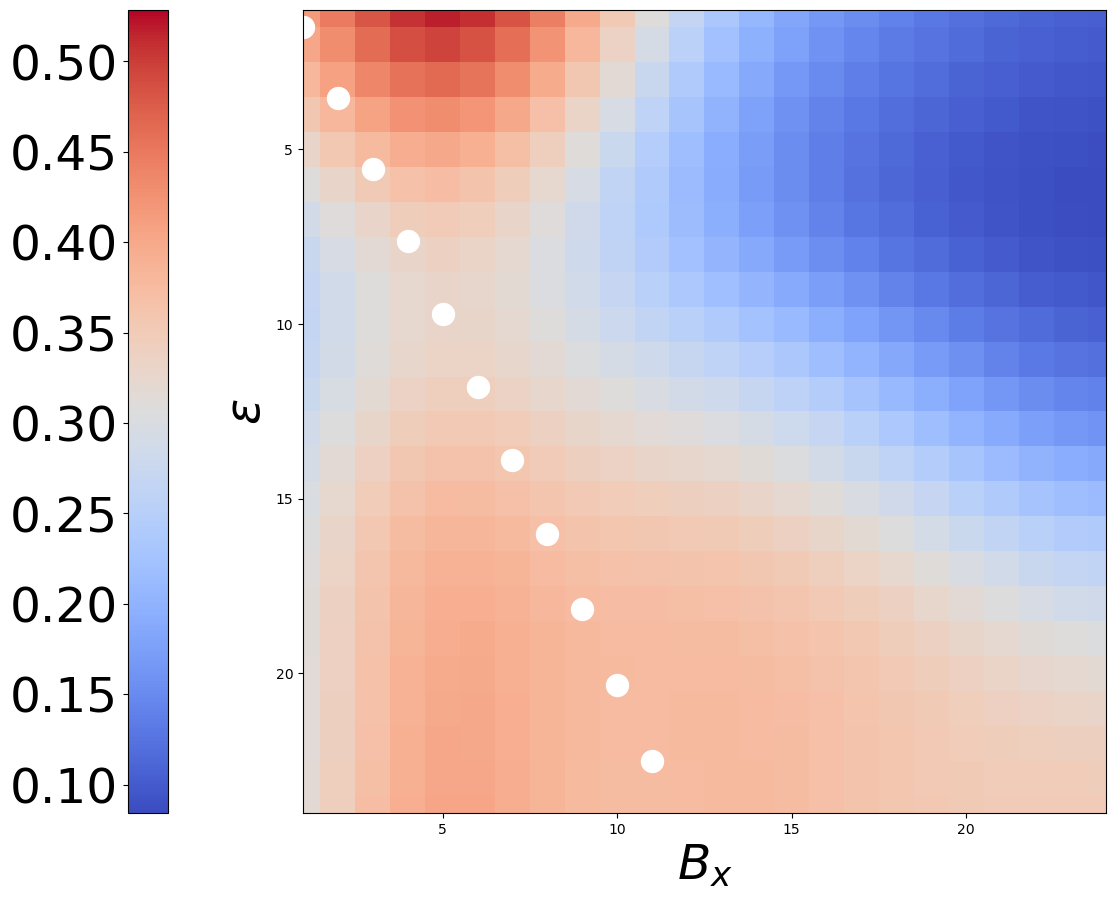

In [81]:
from scipy.ndimage import gaussian_filter1d
import math

folder = "./fig4_alt/"

ncrs = [2000, 4000, 8000, 50000]
index = 3

#filt_y = np.load(folder+"filtered_y_"+str(ncrs[index])+"_30.npy")
#filt_z = np.load(folder+"filtered_z_"+str(ncrs[index])+"_30.npy")
#els_mean = np.load(folder+"els"+str(ncrs[index])+"_mean.npy")
els_mean = np.load(folder+"mean.npy")
els = gaussian_filter1d(els_mean, 3, axis=1)
els = gaussian_filter1d(els, 3, axis=0)
#els = els_mean

#epsilon = 50#ncrs[index]*0.001/2.
#print(epsilon)
value = 0.01#1.4107
#value_up = 4.
#value_dn=0.8
valll = 100
bxs = np.arange(0, valll,4)
eps = np.arange(2000, 100000,3920)
#print(bxs)
#2/2 = 0
#96/2 = 96

bx_plot = []
eps_plot = []
a0=20.
#a0s = np.zeros(len(bxs))
#a0s_up = np.zeros(len(bxs))
#a0s_dn = np.zeros(len(bxs))
for i, bx in enumerate(bxs):
    d = (a0/value)**2-4*(bx**2+a0/value*bx)
    print(d)
    if d>=0:
        bx_plot.append(bx/4.)
        eps_plot.append(((a0/value + math.sqrt(d))/2.-1)/2.)
        bx_plot.append(bx/4.)
        eps_plot.append(((a0/value - math.sqrt(d))/2.-1)/2.)


        #    eps[i] = value*(epsilon**2+bx**2)/(bx+epsilon)
    #a0s_dn[i] = bx*(epsilon**2+bx**2)/(bx+epsilon)
    #a0s_up[i] = value_dn*(epsilon**2+bx**2)/(bx+epsilon)
print(eps_plot)
print(bx_plot)
fig, ax0 = plt.subplots(figsize=(18,11))
im = ax0.imshow(els.T[:,:], cmap='coolwarm')
#plt.colorbar()
#ax0.plot(bxs[0:]/4, a0s[0:]/4, 'k--', lw=8)
#ax0.plot(bxs[0:]/4, a0s_up[0:]/4, 'g--', lw=8)
#ax0.plot(bxs[0:]/4, a0s_dn[0:]/4, 'g--', lw=8)
#ax0.set_xticks(np.arange(0,valll//4)[::10], bxs[::10], fontsize=35)
#ax0.set_yticks(np.arange(0,valll//4)[::10], bxs[::10], fontsize=35)
ax0.set_xlabel("$B_x$", fontsize=35)
ax0.set_ylabel("$\epsilon$", fontsize=35)
ax0.set_xlim(1, 24)
ax0.set_ylim(24, 1)
ax0.scatter(bx_plot,eps_plot, c='w', s=250, zorder=2)
cbar = fig.colorbar(im, orientation='vertical', location='left');
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(35)

'''ax1=ax0.inset_axes([0.7,0.65,0.5,0.5])

ax1.plot(filt_z, filt_y, lw=5, color='k')
ax1.tick_params(axis='both', labelsize=35)
ax1.set_xlabel("$E_y$ filtered", fontsize=35)
ax1.set_ylabel("$E_z$ filtered", fontsize=35)
ax1.set_xlim(-24.0,24.0)
ax1.set_ylim(-25.0,25.0)'''
plt.subplots_adjust(left=0.15, bottom=0.15)
#plt.savefig("fig4_a.pdf", format='pdf')
plt.savefig("fig4_a.png")

##### 

/tmp/ipykernel_6421/2500667195.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  a0s[i] = denom*value/(second+other_second)
/tmp/ipykernel_6421/2500667195.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  a0s_up[i] = denom*value_up/(second+other_second)
/tmp/ipykernel_6421/2500667195.py:34: RuntimeWarning: divide by zero encountered in double_scalars
  a0s_dn[i] = denom*value_dn/(second+other_second)
/home/rishat/miniconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[12.5 15.  15.  15.  17.5 17.5 17.5 17.5 17.5 20.  20.  20.  20.  20.
 20.  20.  22.5 22.5 22.5 22.5 22.5 22.5 22.5 25.  25.  25.  25.  25.
 25.  25.  25.  25.  27.5 27.5 27.5 27.5 27.5 27.5 27.5 27.5 27.5 30.
 30.  30.  30.  30.  30.  32.5 32.5 32.5 32.5 32.5 35.  35.  35.  35.
 35.  35.  35.  35.  37.5 37.5 37.5 37.5 37.5 37.5 37.5 40.  40.  40.
 40.  40.  40.  42.5 42.5 42.5 42.5 42.5 45.  45.  45.  45.  47.5 47.5
 47.5 47.5]


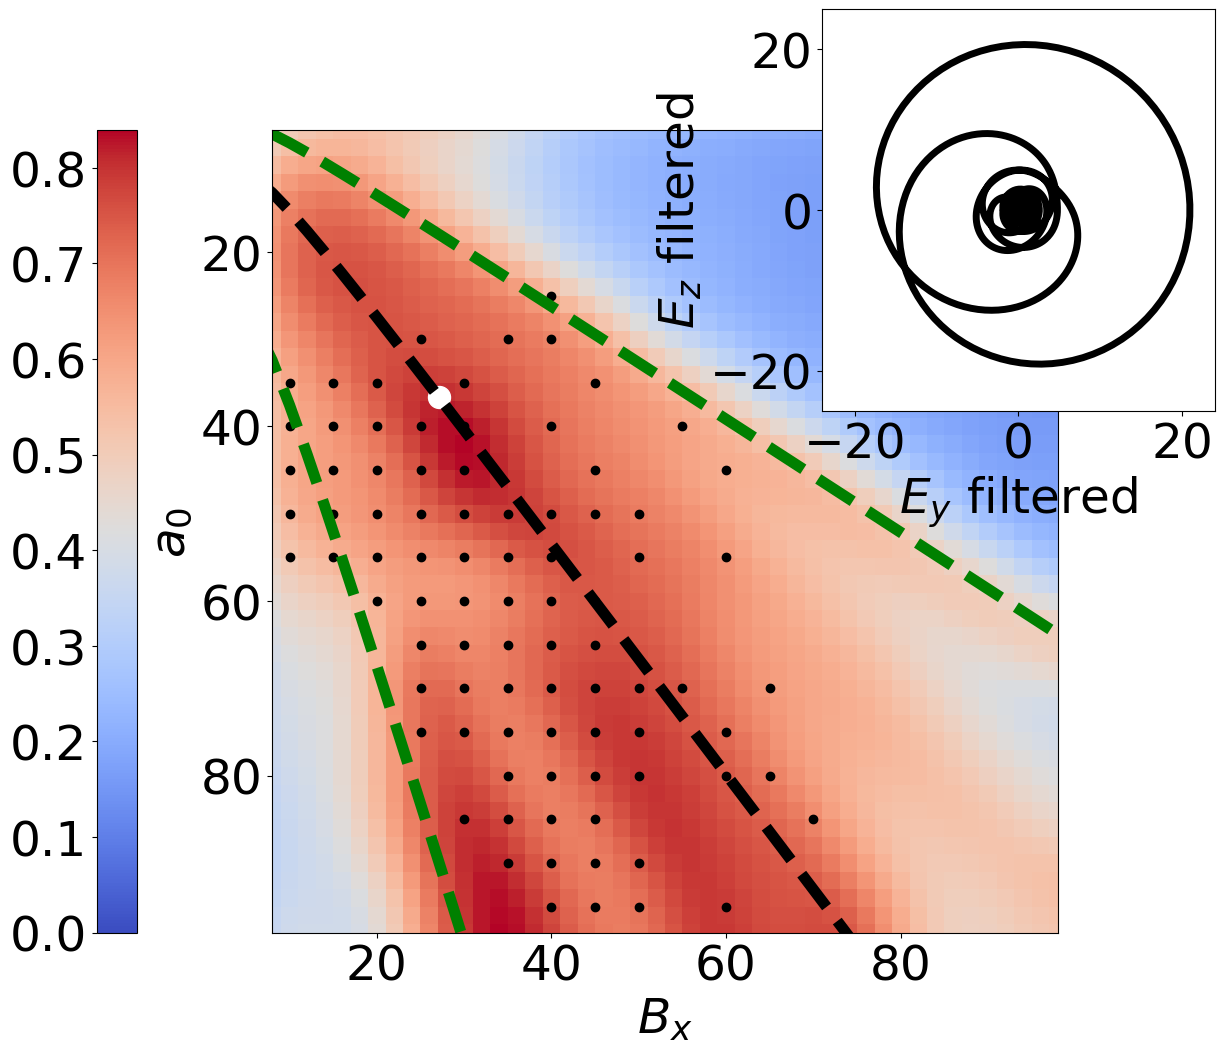

In [61]:
from scipy.ndimage import gaussian_filter1d

folder = "./fig4_alt/"

ncrs = [2000, 4000, 8000, 50000]
index = 2

filt_y = np.load(folder+"filtered_y_"+str(ncrs[index])+"_30.npy")
filt_z = np.load(folder+"filtered_z_"+str(ncrs[index])+"_30.npy")
els_mean = np.load(folder+"els"+str(ncrs[index])+"_mean.npy")
els = gaussian_filter1d(els_mean, 2, axis=1)
els = gaussian_filter1d(els, 2, axis=0)
#els=els_mean

epsilon = ncrs[index]*0.001/2.
ep = epsilon

value_up = 6.5
value = 2.65
value_dn= 1.3
valll = 100

bxs = np.arange(0, valll,2)
a0s = np.zeros(len(bxs))
a0s_up = np.zeros(len(bxs))
a0s_dn = np.zeros(len(bxs))
for i, bx in enumerate(bxs):
    denom = bx**4+2*bx**2*(ep**2-1)+(ep**2+1)**2
    second = bx**3+bx**2*ep+bx*(ep**2-1)+ep**3+ep
    other_second = bx**3-bx**2*ep+bx*(ep**2-1)-ep**3-ep
    maxi = np.max((second+other_second)/denom)
    a0s[i] = denom*value/(second+other_second)
    a0s_up[i] = denom*value_up/(second+other_second)
    a0s_dn[i] = denom*value_dn/(second+other_second)
            

fig, ax0 = plt.subplots(figsize=(18,11))
im = ax0.imshow(els.T[:,:]+0.05, cmap='coolwarm', vmin=0.0)#, vmax=0.7)#'coolwarm')
#plt.colorbar()
ax0.plot(bxs/2, a0s/2, 'k--', lw=8)
ax0.plot(bxs/2, a0s_up/2, 'g--', lw=8)
ax0.plot(bxs/2, a0s_dn/2, 'g--', lw=8)

ax0.set_xticks(np.arange(0,valll//2)[::10])
ax0.set_xticklabels(bxs[::10], fontsize=35)
ax0.set_yticks(np.arange(0,valll//2)[::10])
ax0.set_yticklabels(bxs[::10], fontsize=35)
ax0.set_xlabel("$B_x$", fontsize=35)
ax0.set_ylabel("$a_0$", fontsize=35)

ax0.scatter([13.55],[18.3], c='w', s=250, zorder=2)
cbar = fig.colorbar(im, orientation='vertical', location='left');
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(35)


a0ss = np.load('a0s.npy')*2.5
bxss = np.load('bxs.npy')*2.5
print(a0ss)
ax0.scatter(bxss, a0ss, color='black')

ax0.set_xlim(4, 49)
ax0.set_ylim(49, 3)

ax1=ax0.inset_axes([0.7,0.65,0.5,0.5])

ax1.plot(filt_z, filt_y, lw=5, color='k')
ax1.tick_params(axis='both', labelsize=35)
ax1.set_xlabel("$E_y$ filtered", fontsize=35)
ax1.set_ylabel("$E_z$ filtered", fontsize=35)
ax1.set_xlim(-24.0,24.0)
ax1.set_ylim(-25.0,25.0)
plt.subplots_adjust(left=0.15, bottom=0.15)
plt.savefig("fig4_a.pdf", format='pdf')
plt.savefig("fig4_a.png")


## TRYING TO FIND BETTER FIGURE

/tmp/ipykernel_6421/78819340.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  a0s[i] = denom*value/(second+other_second)
/tmp/ipykernel_6421/78819340.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  a0s_up[i] = denom*value_up/(second+other_second)
/tmp/ipykernel_6421/78819340.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  a0s_dn[i] = denom*value_dn/(second+other_second)


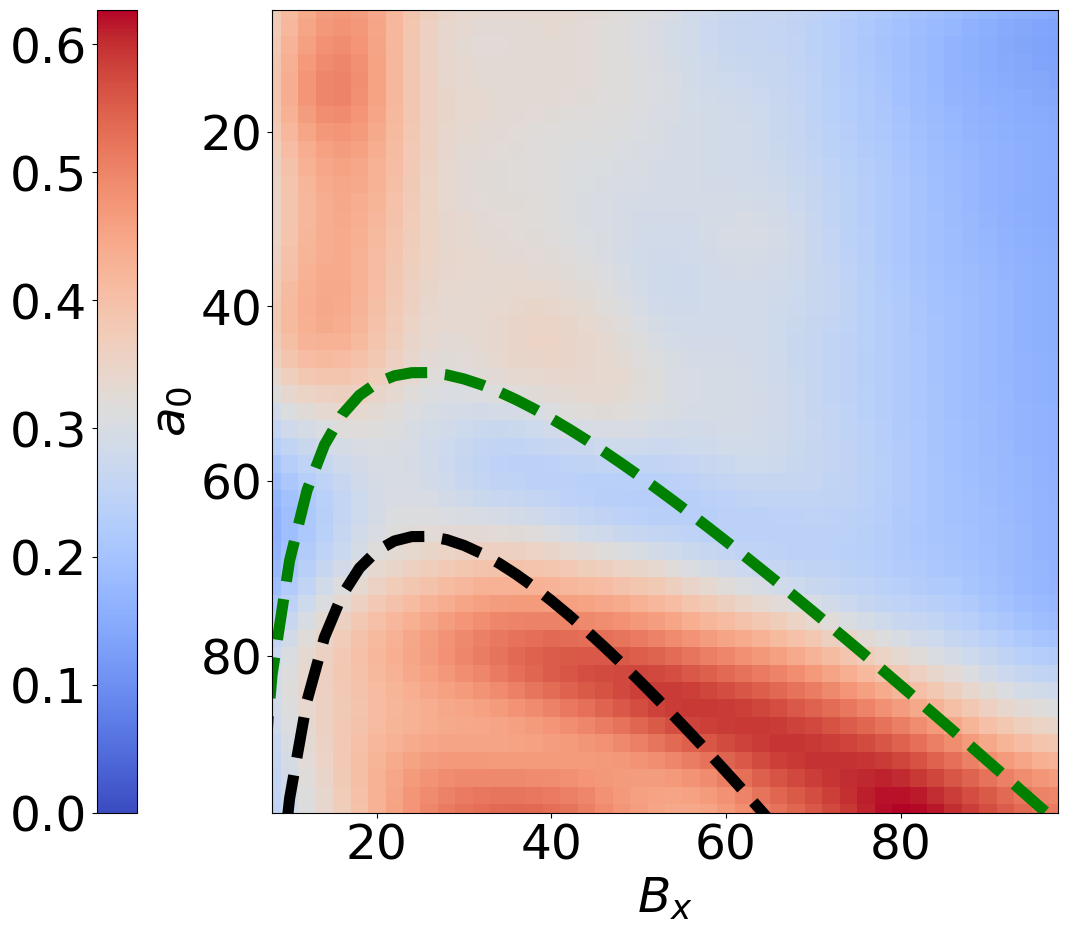

In [63]:
from scipy.ndimage import gaussian_filter1d

folder = "./fig4_alt/"

ncrs = [2000, 4000, 8000, 50000]
index = 3

els_mean = np.load(folder+"els"+str(ncrs[index])+"_mean.npy")
els = gaussian_filter1d(els_mean, 2, axis=1)
els = gaussian_filter1d(els, 2, axis=0)
#els=els_mean

epsilon = (ncrs[index])*0.001/2.
ep = epsilon

value_up = 6.5
value = 2.65
value_dn= 1.9
valll = 100

bxs = np.arange(0, valll,2)
a0s = np.zeros(len(bxs))
a0s_up = np.zeros(len(bxs))
a0s_dn = np.zeros(len(bxs))
for i, bx in enumerate(bxs):
    denom = bx**4+2*bx**2*(ep**2-1)+(ep**2+1)**2
    second = bx**3+bx**2*ep+bx*(ep**2-1)+ep**3+ep
    other_second = bx**3-bx**2*ep+bx*(ep**2-1)-ep**3-ep
    maxi = np.max((second+other_second)/denom)
    a0s[i] = denom*value/(second+other_second)
    a0s_up[i] = denom*value_up/(second+other_second)
    a0s_dn[i] = denom*value_dn/(second+other_second)
            

fig, ax0 = plt.subplots(figsize=(18,11))
im = ax0.imshow(els.T[:,:], cmap='coolwarm', vmin=0.0)#, vmax=0.7)#'coolwarm')
#plt.colorbar()
ax0.plot(bxs/2, a0s/2, 'k--', lw=8)
ax0.plot(bxs/2, a0s_up/2, 'g--', lw=8)
ax0.plot(bxs/2, a0s_dn/2, 'g--', lw=8)

ax0.set_xticks(np.arange(0,valll//2)[::10])
ax0.set_xticklabels(bxs[::10], fontsize=35)
ax0.set_yticks(np.arange(0,valll//2)[::10])
ax0.set_yticklabels(bxs[::10], fontsize=35)
ax0.set_xlabel("$B_x$", fontsize=35)
ax0.set_ylabel("$a_0$", fontsize=35)

cbar = fig.colorbar(im, orientation='vertical', location='left');
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(35)

ax0.set_xlim(4, 49)
ax0.set_ylim(49, 3)


plt.subplots_adjust(left=0.15, bottom=0.15)
plt.savefig("fig4_ab.pdf", format='pdf')
plt.savefig("fig4_ab.png")
